In [ ]:
# Sistem Penilaian Kelayakan Kredit 

In [ ]:
# Naufal Fauzi Firdaus - 221011402293 - 05TPLM009 - Universitas Pamulang

In [4]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

Creditworthiness: 77.97619047619047


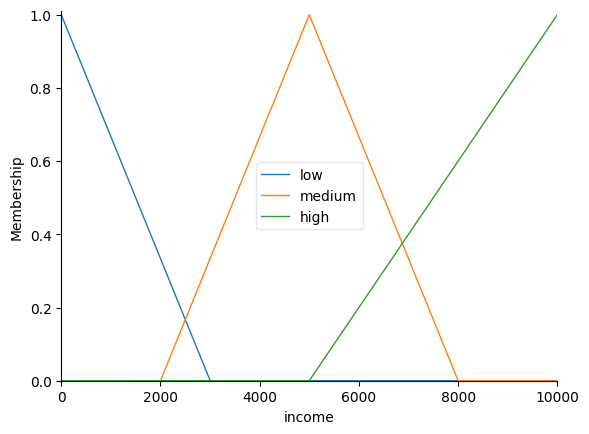

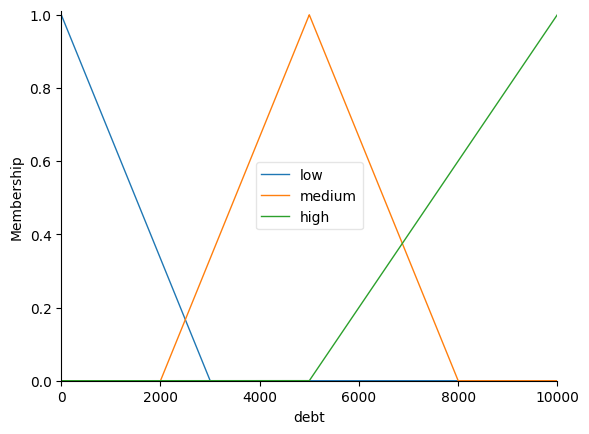

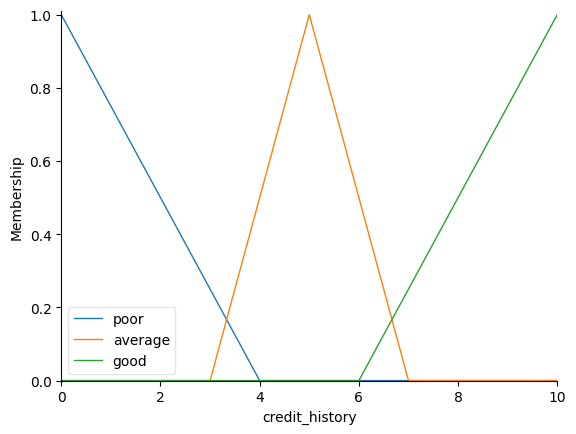

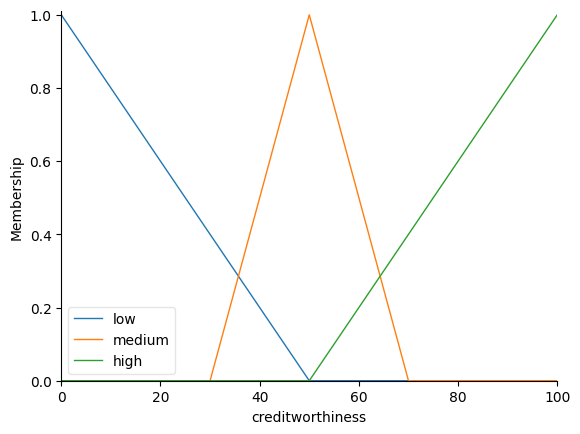

In [5]:
# Create the fuzzy variables
income = ctrl.Antecedent(np.arange(0, 10001, 1), 'income')
debt = ctrl.Antecedent(np.arange(0, 10001, 1), 'debt')
credit_history = ctrl.Antecedent(np.arange(0, 11, 1), 'credit_history')
creditworthiness = ctrl.Consequent(np.arange(0, 101, 1), 'creditworthiness')

# Membership functions for income
income['low'] = fuzz.trimf(income.universe, [0, 0, 3000])
income['medium'] = fuzz.trimf(income.universe, [2000, 5000, 8000])
income['high'] = fuzz.trimf(income.universe, [5000, 10000, 10000])

# Membership functions for debt
debt['low'] = fuzz.trimf(debt.universe, [0, 0, 3000])
debt['medium'] = fuzz.trimf(debt.universe, [2000, 5000, 8000])
debt['high'] = fuzz.trimf(debt.universe, [5000, 10000, 10000])

# Membership functions for credit history
credit_history['poor'] = fuzz.trimf(credit_history.universe, [0, 0, 4])
credit_history['average'] = fuzz.trimf(credit_history.universe, [3, 5, 7])
credit_history['good'] = fuzz.trimf(credit_history.universe, [6, 10, 10])

# Membership functions for creditworthiness
creditworthiness['low'] = fuzz.trimf(creditworthiness.universe, [0, 0, 50])
creditworthiness['medium'] = fuzz.trimf(creditworthiness.universe, [30, 50, 70])
creditworthiness['high'] = fuzz.trimf(creditworthiness.universe, [50, 100, 100])

# Define fuzzy rules
rule1 = ctrl.Rule(income['low'] & debt['high'] & credit_history['poor'], creditworthiness['low'])
rule2 = ctrl.Rule(income['medium'] & debt['medium'] & credit_history['average'], creditworthiness['medium'])
rule3 = ctrl.Rule(income['high'] & debt['low'] & credit_history['good'], creditworthiness['high'])
rule4 = ctrl.Rule(income['medium'] & debt['low'] & credit_history['good'], creditworthiness['high'])
rule5 = ctrl.Rule(income['low'] & debt['medium'] & credit_history['average'], creditworthiness['medium'])

# Create the control system and simulation
credit_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
credit_simulation = ctrl.ControlSystemSimulation(credit_ctrl)

# Example input values
credit_simulation.input['income'] = 4500
credit_simulation.input['debt'] = 2000
credit_simulation.input['credit_history'] = 7

# Perform the computation
credit_simulation.compute()

print(f"Creditworthiness: {credit_simulation.output['creditworthiness']}")

# Plot the membership functions
income.view()
debt.view()
credit_history.view()
creditworthiness.view()
plt.show()